# Olber's Paradox

In this Notebook, we will go over how to computationally address and approximate the Olber's Paradox! This Paradox is meant to address the notion that the Universe is infinitely large by begging the question "Why is the night sky dark"? While this seems like a fairly simple question to answer, it's computational solution works off some complex statistics, calculus (mainly infinity), and understandings of our Universe! Deceptively simple, but you will learn about the elegance of the solution while also improving your skills in programming, mathematical reasoning, statistics, visualization of abstract concepts, and many more relevant skills you can use in your everyday life!

## Start
Before we can delve into the paradox, we must import our necessary packages: matplotlib.pyplot, and numpy. In the next cell, please import both as plt and np respectively.

In [26]:
import matplotlib.pyplot as plt
import numpy as np

## Generating a Star
Now that we have our packages imported, we can start addressing the fundamentals needed to examine the paradox. We will need to generate stars at randomized x, y, and z positions in order to create some sort of star map. This may seem a bit daunting, but we can reduce this into a few key steps!

1. We don't need to consider every single direction, just the one we are travelling in, so let's restrict the volume we care about to a 1 x 1 x L parsec box where L is the depth of the star map! In that case, what is the volume of our star map?
2. Define the number of stars are in a space given the volume. How can we do this? (Hint: Look at the variable names below!)

**Warning** I suggest keeping the numStars variable below a million, as it will become computationally heavy to plot (100 thousand can already take 10-15 seconds)!

In [60]:
starDensity = 1 #give some sort of density here in terms of star/parsec^3
desiredDepth = 100000 #lets say the depth will be in parsecs

base = 1000 #makes plot onwards more pronounced
numStars = int(starDensity * desiredDepth) #calculates number of stars based on density and volume/depth

## Create Coordinates
Great! We now have a cell which can based on a star density and desired depth provide the number of stars will be in our star map. Keep in mind that our star density is approximated by our neighborhood (our next closest star is roughly one parsec away). In actuality, the star density on a larger scale can approach 1e-3! We can use this later on. For now, let's keep using this density so our star map is more pronounced.

Now that we have a way to generate the number of stars, we now need to place them. For this, let's consider the following for each axis:

1. The x and y axis are confined between 0 and 1, we can use np.random.rand() to accomplish this! Look at the [documentation for this function](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html), how can we easily generate all the coordinates we need using it?
2. Our Z coordinate is based on values outside of 0 and 1. In fact, we need it to be between 0 and our map depth! Look in the documentation found above to see what function may be able to help us create a random array with values between 0 and our bounds.
3. Our Z coordinate is important to display depth into the star map, but how can we show this on a 2D scatter plot? Think what changes as you move away from an object, and how much it changes. How can we translate our depth into this new attribute.
 


In [48]:
def StarMaker(numStars, desiredDepth): #generates numStar amount coordinates and brightness/size of star based on random depth 
    xCor = np.random.rand(numStars) #randomly generated x (0-1)
    yCor = np.random.rand(numStars) #randomly generated y (0-1)
    distances = np.random.uniform(0, desiredDepth, numStars) #randomly generated z [0-depth)
    brightness = 1/distances**2 #calculates the brightness/size from z value to display on graph
    return xCor, yCor, brightness #returns x, y, and brightness/size/z


xCor, yCor, brightness = StarMaker(numStars, desiredDepth)

## Plotting our Star Map
We now have a function which can produce values for an x, y, and brightness/size! With these values, we can finally plot a scatter plot of our star map. Below you will find some incomplete code to fill in. Feel free to use the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) for the plt.scatter function to add additional features. For instance, you can change the colors of the dots and have a color scale on the side!

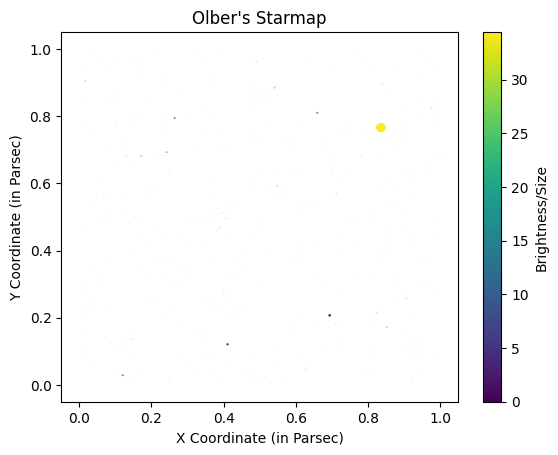

In [49]:
fig, ax = plt.subplots()
starMap = ax.scatter(xCor, yCor, s=brightness, c = brightness, cmap = 'viridis') #maps the stars with sizes and colors corresponding to their size in the map
ax.set(xlabel = "X Coordinate (in Parsec)", ylabel = "Y Coordinate (in Parsec)", title = "Olber's Starmap")
colorbar = plt.colorbar(starMap) #generates colorbar based on size/brightness
colorbar.set_label("Brightness/Size")
plt.show()
fig.savefig("OlbersStarMap3.png", dpi=300, bbox_inches = 'tight')

## Probability of Hitting a Star: Our Cross Section
Now that we have a working star map, we can finally start to visualize what space looks like with stars scattered about! As you can see, it is pretty barren, and does not seem to be very likely that we hit anything. How do we know this for certain though? After all, we did not compute any sort of probability when we plot. Next, we will create a function which can calculate the odds we hit a star on a given star map. This is probably the most challenging part of the Notebook, but we will work through it step by step!

To find the probability of hitting a star, we must identify what kind of distribution we are talking about, and our area of interest. Let's make the analogy that it is **you** that is flying through space (don't worry, you have a top-of-the-line spacesuit to keep you safe)! From your perspective, you don't really care about what is going on more than a star's distance away from you, as those stars won't hit you! 

![Sun v Earth](https://grade8science.com/wp-content/uploads/2019/09/Fig-1.19-v1.png)
*The Earth compared to the sun. See how the planet looks almost like a point? Only the sun's size really matters when it comes to the possibility for collision!*

With that, we can say that our area of interest or our *cross section* will have the radius of a star. For simplicity, let's say this radius is that of our own sun! This is a fine approximation to make, as large stars are actually quite rare, whereas sun-like stars are far more abundant. From there, we can also calculate the volume of space we will intersect with as a cylinder; we have a maximum depth and a radius.

Let's stop here for a second, we have another volume in a space we already know the star density for. Perhaps we can use this knowledge to calculate the number of stars that would exist in our cylinder. Try to calculate the average number of stars we may find in our cylinder! Make sure that your density and volume use the same units! That may mean converting values into one distance system (km, Ly, parsec). From here on, we will use a lower value of stellar density to better mimic the Universe, but feel free to play around with it!

In [30]:
starDensity = 1e-4 #updating value of density to be more realistic
pathRadius = 2.255582385e-8 #radius of sun in parsecs
pathVol = np.pi * pathRadius ** 2 * desiredDepth #volume of the cross section
pathStar = starDensity * pathVol #average number of stars in the cross section
print(pathStar)

1.598332981899501e-10


## Probability of Hitting a Star: The Poisson Distribution

If you decided to print the number of stars you would expect to find in our cross section, you would discover it is incredibly small. This is yet another indication that we probably won't hit a star in this region, but we still have a bit more work to do to find a formal probability! To save a bit of time scouring statistics textbooks, this probability can be found by using the **Poisson Distribution**. If you are unfamiliar, this distribution describes the likelihood of some number of events happening given a frequency of that event occurring, and either a timeframe or segment of space. That is perfect for us; we have a frequency for the amount of stars we would expect to find in a given volume, and we also have a volume to use it on!

The formula for the Poisson distribution is given by:

$$ P(k; \lambda) = \frac{e^{-\lambda} \lambda^k}{k!} $$

Where:
- $P(k; \lambda)$ is the probability of observing $k$ events.
- $\lambda$ is the average number of events in the given interval.
- $e$ is the base of the natural logarithm.

In our case we really only care about one thing: hitting a star. In other words, we are interested in all cases **except** the probability of hitting nothing. Can you think of how we can use the poisson probability to calculate the odds of hitting a star? 

Hint: If we know that 1 represents the total probability, we would know the odds of hitting something $P(>0, \lambda)$ if we know the odds of hitting nothing $P(0, \lambda)$ as those are our only possible outcomes! One of these is easier to calculate, just look at the equation and start plugging in for $k$, what happens?

Once you figured out how to determine the probability of hitting a star, you can code it. In the cell below, create a function that, when inputted the frequency of encountering a star in our cylinder, will output the probability of hitting a star!

In [31]:
def EncounterProbability(lam): #input lambda for the probability of hitting a star
    return 1 - np.exp(-lam)

print(EncounterProbability(pathStar))

1.5983325774016066e-10


## Now it is Your Turn!

We have a working function for determining the probability we hit a star, given a star density, path radius, and path length! Now, the next bit will be left to you to complete on your own. Everything you need to complete these next two questions can be found by applying the skills we used above to find the encounter probability! Try to find the following:

1. Write a new function which takes in the desired probability instead of the pathLength. At what depth can we expect to surpass a 50% chance that we collide with a star?
2. How does this number compare with the largest estimated size of the Universe at 14.256 Billion parsecs in radius?
3. Why is the night sky dark?

In [59]:
#A sample solution to this particular line of questioning
def EncounterLength(prob, radius, starDensity):
    return -np.log(1 - prob)/(np.pi * radius ** 2 * starDensity)
prob = .5
depthNeeded = EncounterLength(prob, pathRadius, starDensity)
if(depthNeeded > 14.256e9):
    print("The Size of the Universe needed to encounter a star along a path at least " + str(prob * 100) + "% of the time is " + str(depthNeeded) + " Parsecs, this number surpasses the largest estimated size of the Universe. This means that the night is dark because the Universe is not infinite!")
else:
    print("The Size of the Universe needed to encounter a star along a path at least " + str(prob * 100) + "% of the time is " + str(depthNeeded) + " Parsecs, this number is beneath the largest estimated size of the Universe. As a result, we cannot say the Universe is not infinite!")


The Size of the Universe needed to encounter a star along a path at least 50.0% of the time is 433668821459337.56 Parsecs, this number surpasses the largest estimated size of the Universe. This means that the night is dark because the Universe is not infinite!
